# Bias - Variance tradeoff

The **bias-variance tradeoff** is a fundamental concept in machine learning <span style="font-size: 11pt; color: orange; font-weight: bold">that deals with the balance between the model's ability to learn from data and its ability to generalize to unseen data</span>. 

It relates to the two types of errors a model can make: 
- **Bias error**
- **Variance error**

## <u>Bias</u>:

Bias error refers to the difference between the expected predictions of a model and the true values in the data. A high bias means the model is overly simplistic and unable to capture the underlying patterns in the data.  

This can lead to <span style="font-size: 11pt; color: red; font-weight: bold">underfitting</span>, where the model is unable to learn the complexities of the problem and performs poorly both on the training and test data.

## <u>Variance</u>:

Variance error, on the other hand, is the variability of model predictions for different training sets. A high variance indicates that the model is highly sensitive to the training data, capturing noise and random fluctuations instead of the true underlying patterns.  

This can lead to <span style="font-size: 11pt; color: red; font-weight: bold">overfitting</span>, where the model fits the training data extremely well but fails to generalize to new, unseen data.

## <u>Tradeoff</u>:

The bias-variance tradeoff arises because **reducing one type of error often increases the other**. For example, as you make a model more *complex* (e.g., by adding more features or increasing the model's capacity), it becomes more flexible and can capture intricate patterns in the data, reducing bias. However, this increased complexity can also make the model more sensitive to small variations in the training data, leading to higher variance.

Finding the right balance is crucial. <span style="font-size: 11pt; color: green; font-weight: bold">Ideally, we want to minimize both bias and variance to achieve a model that generalizes well</span>. This can be achieved through techniques such as regularization, cross-validation, ensemble methods and many others.

## <u>Example</u>:

When we add more polynomial features to the input data, we increase model's capacity to fit the training data more accurately. By including higher-degree polynomial terms, the model becomes more flexible and can capture complex relationships and variations in the training data. This results in a lower bias, as the model can closely approximate the underlying function.

However, increasing the number of polynomial features can also lead to higher variance in the model's predictions. The model becomes highly sensitive to small variations in the training data, including noise and outliers. **This increased sensitivity can cause the model to overfit the training data, resulting in poor generalization to new, unseen data**.

## Importing libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#### Generate synthetic data

In [2]:
# Generate some synthetic data
np.random.seed(11)
X = np.random.randn(1, 1000).reshape(-1, 1)
y = 2 * X + np.random.randn(1000, 1)

# Split the data into training and test sets
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

### Train the linear model with different polynomial degrees 

In [3]:
# Fit models with different polynomial degrees
degrees = [1, 5, 15]
train_errors = []
test_errors = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predict on training and test data
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    # Calculate mean squared error
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

#### Plot errors made by models with different polynomial degrees

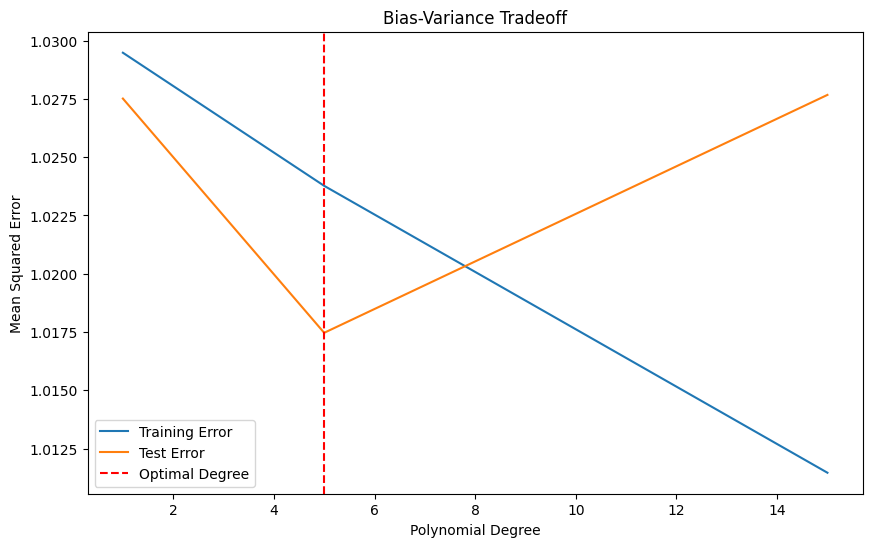

In [4]:
# Plot the bias-variance tradeoff
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()

# Add vertical line at the optimal degree
plt.axvline(x=5, color='r', linestyle='--', label='Optimal Degree')
plt.legend()
plt.show()

As we can see from the plot above, the optimal perfomance on the validation set was achieved by the model with 5 polynomial features, while further increases of the polynomial degrees led to overfitting and poor generalization ability.